<a href="https://colab.research.google.com/github/ShriRamyaA/1st-Assignment/blob/master/icp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ICP 4** 
Shri Ramya Ashok
&
Revathi Chowdary


---


**Exercise 1 - Numpy** 


---



In [148]:
import numpy as np
# Create array of random integers from 1-20
x = np.random.randint(1,20, size=(15))
print(x)

[17  2 18  1 15 13  3 10 15 10  4 12 14  8 15]


In [149]:
# 1. reshape the array
arr = x.reshape(3,5)
print(arr)

[[17  2 18  1 15]
 [13  3 10 15 10]
 [ 4 12 14  8 15]]


In [150]:
# 2. print the shape 
print(arr.shape)

(3, 5)


In [151]:
# 3. replace row max by 0
row_max = arr.max(axis=1).reshape(-1,1)
new_arr = np.where(arr==row_max,0, arr)
print(new_arr)

[[17  2  0  1 15]
 [13  3 10  0 10]
 [ 4 12 14  8  0]]


In [152]:
# 4. extract diagonal and save in .npy file
diag = np.diag(new_arr)
np.save('diag', diag)
print(np.load('diag.npy'))

[17  3 14]


**Exercise 2 - Pandas**


---



In [153]:
# 1. read data.csv file
import pandas as pd

df = pd.read_csv ('data.csv')

# 2. statistical description about data
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [154]:
# 3. Check if data has null
print("Data has\n",df.isnull().sum(), "\n null values")

# 3.a. replace null with mean value
newdf = df.fillna(df.mean())
df = newdf
print("\n\nNew data has\n", df.isnull().sum(), "\n null values")

Data has
 Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64 
 null values


New data has
 Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64 
 null values


In [155]:
# 4. using groupby function with aggregation to get mean, min and max values
result = df.groupby(['Maxpulse','Calories']).agg({'Duration': ['min', 'max','count', 'mean']})
  
print("Min, max, count and mean values of Duration grouped by Maxpulse and Calories")
print(result)

Min, max, count and mean values of Duration grouped by Maxpulse and Calories
                  Duration                  
                       min  max count   mean
Maxpulse Calories                           
100      50.5           15   15     1   15.0
         500.0          90   90     1   90.0
         500.4          90   90     1   90.0
101      300.0          60   60     1   60.0
103      242.0          45   45     1   45.0
...                    ...  ...   ...    ...
172      226.4          20   20     1   20.0
175      238.0          30   30     1   30.0
         282.4          45   45     1   45.0
182      319.2          30   30     1   30.0
184      1860.4        210  210     1  210.0

[161 rows x 4 columns]


In [156]:
# 5. subgroup df by calories>500 and calories<1000
df_cal = df[(df['Calories']>500) & (df['Calories']<1000)]
df_cal

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [157]:
# 6. subgroup df by calories>500 and pulse<100
df_cal_pul = df[(df['Calories']>500) & (df['Pulse']<100)]
df_cal_pul

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [158]:
# 7. create dataframe except Maxpulse column
df_modified = df.loc[:, df.columns!='Maxpulse']
print("The columns of df_modifies are:",df_modified.columns)

The columns of df_modifies are: Index(['Duration', 'Pulse', 'Calories'], dtype='object')


In [159]:
# 8. Delete Maxpulse column from main dataframe-df
del df['Maxpulse']
print("The columns of df are:",df.columns)

The columns of df are: Index(['Duration', 'Pulse', 'Calories'], dtype='object')


In [160]:
# 9. Convert calories data type to int
print("The data type of the column Calories before converting is:",df['Calories'].dtypes)
df['Calories'] = df['Calories'].astype(int)
print("The data type of the column Calories after converting is:",df['Calories'].dtypes)

The data type of the column Calories before converting is: float64
The data type of the column Calories after converting is: int64


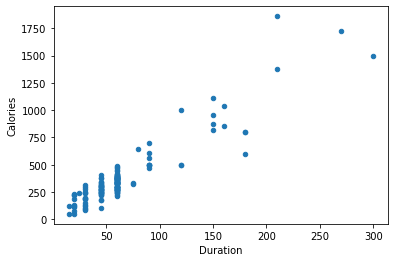

In [161]:
# 10. Scatter plot - Duration vrs Calories
df.plot.scatter('Duration','Calories')

**Exercise 3 - Matplotlib**


---



In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as image

# 1. Read umkc.jpg
umkc_img = image.imread('umkc.jpg')

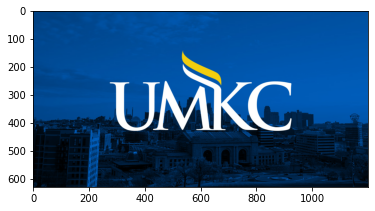

In [162]:
# 2. Show the read image
plt.imshow(umkc_img)
plt.show()

In [163]:
# 3. print the image shape
umkc_img.shape

(630, 1200, 3)

Image reformed using Image from PIL:


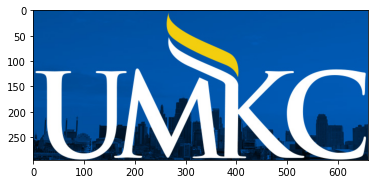



Image reformed using matplotlib:


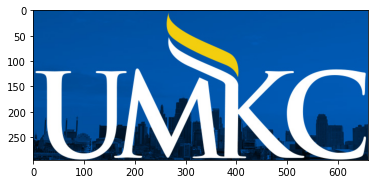

In [164]:
# 4. crop the image using numpy
from PIL import Image

image_arr = np.array(umkc_img) 
# Crop image
cropped_image_arr = image_arr[135:430, 270:930]
# Convert array to image
cropped_img_pil = Image.fromarray(cropped_image_arr)
print("Image reformed using Image from PIL:")
plt.imshow(cropped_img_pil)
plt.show()
# or
print("\n\nImage reformed using matplotlib:")
plt.imshow(cropped_image_arr)

In [165]:
# 5. Save cropped image
plt.imsave('cropped_img.jpg', cropped_image_arr)

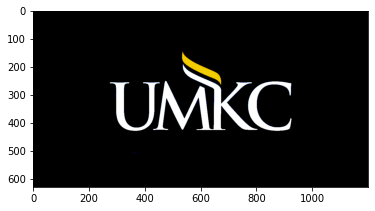

In [166]:
# 6. Change the background color to black
np_where_image = np.where((image_arr<200), 0, image_arr)
plt.imshow(np_where_image)

In [167]:
# 7. Save the background modified image
plt.imsave('np_where_image.jpg', np_where_image)